In [3]:
pip install pandas numpy matplotlib keras tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 4.5 MB/s eta 0:00:00m eta 0:00:010:01:01
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# Enable inline plotting in Jupyter Notebooks
%matplotlib inline


2024-07-23 10:11:06.877399: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-23 10:11:07.260288: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-23 10:11:07.261608: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-23 10:11:08.993914: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [9]:
#Get the Dataset
#df=pd.read_csv(“~/Downloads/StockMarket/MSFT.csv”,na_values=[‘null’],index_col=’Date’,parse_dates=True,infer_datetime_format=True)
df=pd.read_csv("~/Downloads/StockMarket/MSFT.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1987-06-23,0.360243,0.360243,0.348958,0.356771,0.220379,100771200
1987-06-24,0.358507,0.368056,0.358507,0.363715,0.224669,82684800
1987-06-25,0.362847,0.364583,0.359375,0.362847,0.224133,44035200
1987-06-26,0.363715,0.365451,0.360243,0.363715,0.224669,21945600
1987-06-29,0.363715,0.363715,0.355903,0.361979,0.223596,25632000


In [12]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", df. shape)
print("Null Value Present: ", df.isnull().values.any())
#Output:
#>> Dataframe Shape: (7334, 6)
#>>Null Value Present: False

Dataframe Shape:  (9343, 6)
Null Value Present:  False


<Axes: xlabel='Date'>

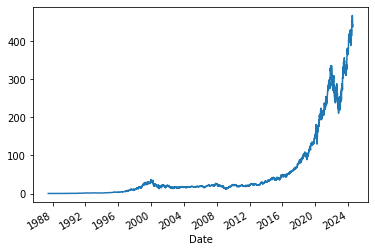

In [14]:
#Plot the True Adj Close Value
df['Adj Close'].plot()

In [16]:
# Plot the 'Adj Close' column
#df['Adj Close'].plot()
#plt.title('Adjusted Close Price')
#plt.xlabel('Date')
#plt.ylabel('Adjusted Close')
#plt.show()

In [18]:
#Set Target Variable
output_var = pd.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [19]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
1987-06-23,0.000177,0.000141,0.000194,0.123653
1987-06-24,0.000173,0.000158,0.000215,0.100613
1987-06-25,0.000182,0.000150,0.000217,0.051376
1987-06-26,0.000184,0.000152,0.000219,0.023236
1987-06-29,0.000184,0.000148,0.000209,0.027932


In [20]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [21]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [24]:
pip install pydot

Defaulting to user installation because normal site-packages is not writeable
  Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.7
    Uninstalling pyparsing-3.0.7:
      Successfully uninstalled pyparsing-3.0.7
Note: you may need to restart the kernel to use updated packages.


In [26]:
#sudo apt-get install graphviz

In [27]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss= 'mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [28]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
1062/1062 [==============================] - 10s 3ms/step - loss: 485.2562
Epoch 2/100
1062/1062 [==============================] - 3s 3ms/step - loss: 787.3782
Epoch 3/100
1062/1062 [==============================] - 3s 3ms/step - loss: 560.3088
Epoch 4/100
1062/1062 [==============================] - 3s 3ms/step - loss: 299.0772
Epoch 5/100
1062/1062 [==============================] - 3s 3ms/step - loss: 144.7376
Epoch 6/100
1062/1062 [==============================] - 3s 3ms/step - loss: 61.8218
Epoch 7/100
1062/1062 [==============================] - 3s 3ms/step - loss: 24.6278
Epoch 8/100
1062/1062 [==============================] - 3s 3ms/step - loss: 9.9726
Epoch 9/100
1062/1062 [==============================] - 3s 3ms/step - loss: 5.0730
Epoch 10/100
1062/1062 [==============================] - 3s 3ms/step - loss: 3.2412
Epoch 11/100
1062/1062 [==============================] - 3s 3ms/step - loss: 2.3097
Epoch 12/100
1062/1062 [==============================] - 4s 

1062/1062 [==============================] - 4s 3ms/step - loss: 0.7534
Epoch 98/100
1062/1062 [==============================] - 4s 3ms/step - loss: 0.7512
Epoch 99/100
1062/1062 [==============================] - 3s 3ms/step - loss: 0.7492
Epoch 100/100
1062/1062 [==============================] - 4s 3ms/step - loss: 0.7472


In [29]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

27/27 [==============================] - 0s 2ms/step


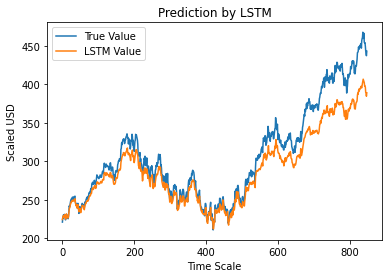

In [31]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()